In [1]:
%reset
import numpy as np
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
import matplotlib.pyplot as plt
import datetime
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Load the HF radar data in netCDF format, downloaded from AODN
hfr_data = Dataset('/home/z3525831/satellite2\.nc')
coastline = "/media/z3525831/EMTEC/UNSW2/Data trait de cote/eaccoast (1).dat"
coast=np.loadtxt(coastline)

In [3]:
# Take a look at the variables
print(hfr_data.variables.keys())

odict_keys(['TIME', 'LONGITUDE', 'LATITUDE', 'start_time', 'end_time', 'GSLA', 'GSL', 'UCUR', 'VCUR'])


In [4]:
# Look at the time variable format (datenum, or Matplotlib dates)# Look  
hfr_data.variables['TIME'][0:10]

masked_array(data=[9952.0, 9953.0, 9954.0, 9955.0, 9956.0, 9957.0, 9958.0,
                   9959.0, 9960.0, 9961.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=9.969209968386869e+36)

In [5]:
# Get time units, calendar used, and convert from num to date
units = hfr_data.variables['TIME'].units
calendar = hfr_data.variables['TIME'].calendar

t = num2date(hfr_data.variables['TIME'][:], units=units, calendar=calendar)
print(t[0]), print(t[-1])

2012-04-01 00:00:00
2013-08-08 00:00:00


(None, None)

In [6]:
# Assign variable names for U, V, lon, lat, and create Speed# Assign  
u = hfr_data.variables['UCUR'][:,:,:]
v = hfr_data.variables['VCUR'][:,:,:]
lon = hfr_data.variables['LONGITUDE'][:]
lat = hfr_data.variables['LATITUDE'][:]
s = (u**2 + v**2)**0.5
P = 0.5 * 1025* (s**3)     
Pf = P/1000

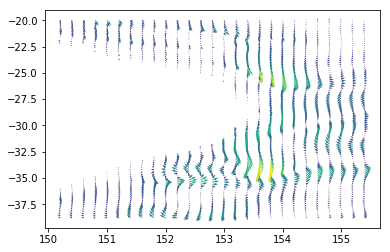

In [7]:
# Get full info on LAT/LON/TIME - i.e. their units etc. as well as data# Get ful 
LAT = hfr_data.variables['LATITUDE']
LON = hfr_data.variables['LONGITUDE']
TIME = hfr_data.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 80
speedData = s[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = hfr_data.variables['UCUR'][timeIndex,:,:]
vData = hfr_data.variables['VCUR'][timeIndex,:,:]
units = hfr_data.variables['UCUR'].units

# Plot velocity field
Q = plt.quiver(lonData[::], latData[::], uData[::,::], vData[::,::], speedData[::,::], units='width')
show()

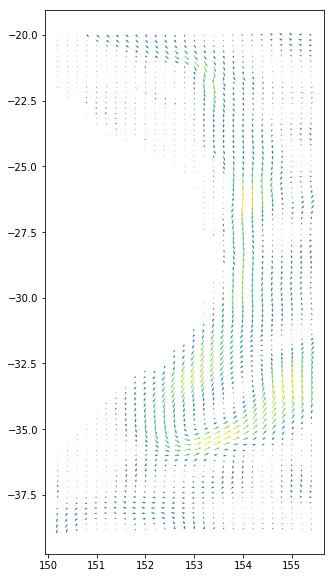

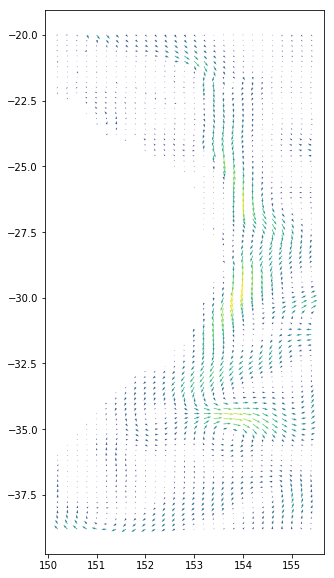

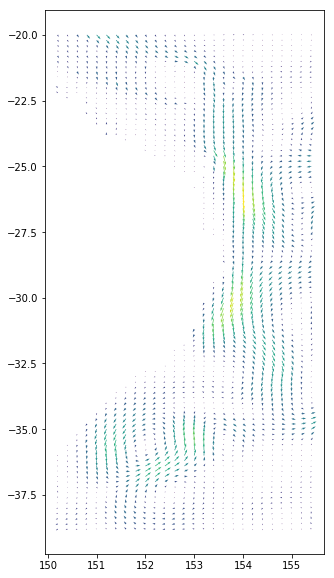

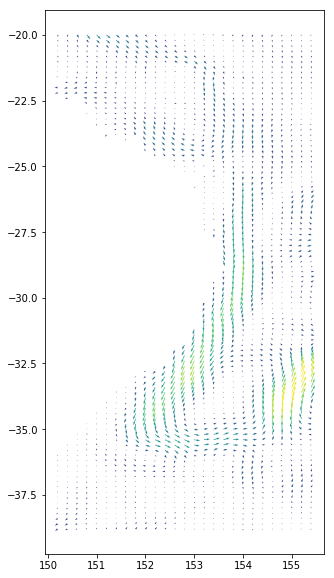

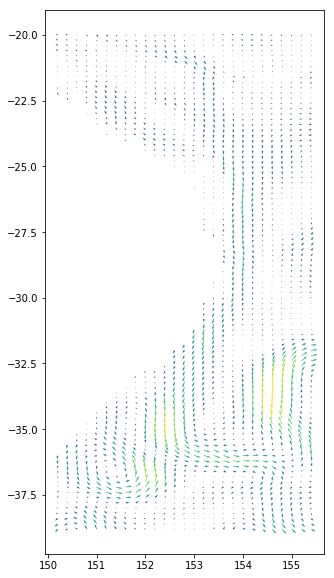

In [8]:
# Loop through the plotting# Loop  
for timeIndex in range(0,len(TIME[:]),100):
    # Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
    speedData = s[timeIndex,:,:]
    latData = LAT[:]
    lonData = LON[:]

    # sea water U and V components
    uData = hfr_data.variables['UCUR'][timeIndex,:,:]
    vData = hfr_data.variables['VCUR'][timeIndex,:,:]
    units = hfr_data.variables['UCUR'].units

    #title(num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y %H:%M'))
    #xlabel(LON.long_name + ' in ' + LON.units)
    #ylabel(LAT.long_name + ' in ' + LAT.units)

    #plot velocity field
    plt.figure(figsize=(5,10))
    plt.quiver(lonData[:], latData[:], uData[:,:], vData[:,:], speedData[:,:], units='width')
    show()
#     plt.pause(1)

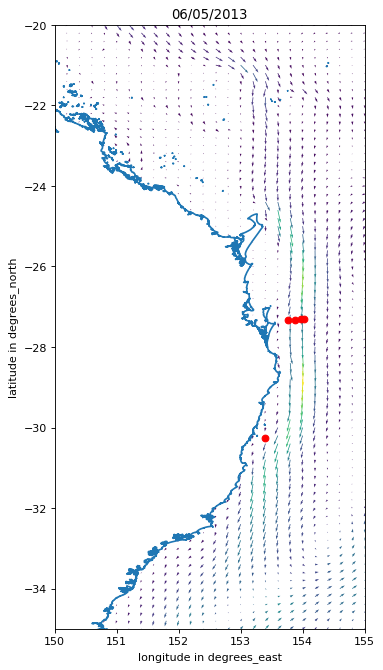

In [9]:
# Choose an interval over which to take a mean
ti = np.logical_and(t>datetime.datetime(2012, 4, 1, 0, 0, 0),t<datetime.datetime(2013, 8, 8, 0, 0, 0))

# Take mean over interval
um = np.mean(u[ti,:,:],axis=0)
vm = np.mean(v[ti,:,:],axis=0)
sm = np.mean(s[ti,:,:],axis=0)
pm = np.mean(Pf[ti,:,:],axis=0)
# Prepare figure and axes labels
figure1 = figure(figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
title(num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)
plt.plot(coast[:,0],coast[:,1])
plt.ylim(-35, -20)     
plt.xlim(150, 155)
# Plot Time Mean velocity field

#ADCP
plt.plot([153.39], [-30.27], 'ro')
plt.plot([153.77], [-27.34], 'ro') #SEQ200
plt.plot([153.88], [-27.33], 'ro') #SEQ400
plt.plot([153.97], [-27.31], 'ro') #EAC1
plt.plot([154.03], [-27.30], 'ro')
#spac = 5
Q = plt.quiver(lonData[::], latData[::], um[::,::], vm[::,::], pm[::,::], units='width')
show()

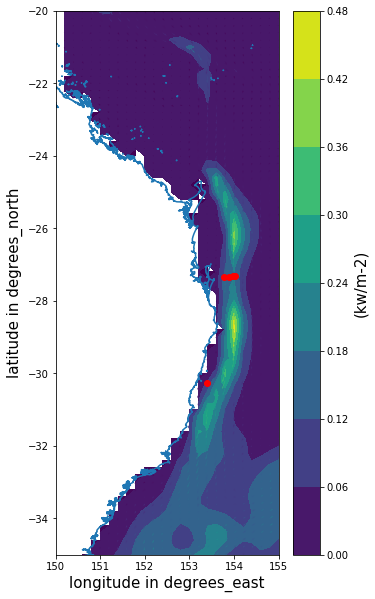

In [11]:
plt.figure(figsize=(5,10))
Q2 = plt.pcolor(lonData[::], latData[::],pm[::,::])
plt.contourf(lonData[::], latData[::],pm[::,::])
cbar = colorbar()
#plt.title("EAC power density",fontsize=15)
xlabel(LON.long_name + ' in ' + LON.units,fontsize=15)
ylabel(LAT.long_name + ' in ' + LAT.units,fontsize=15)
cbar.ax.set_ylabel('(kw/m-2)',fontsize=15)
plt.plot(coast[:,0],coast[:,1])
plt.ylim(-35, -20)     
plt.xlim(150, 155)
Q = plt.quiver(lonData[::], latData[::], um[::,::], vm[::,::], pm[::,::], units='width')
#ADCP
plt.plot([153.39], [-30.27], 'ro')
plt.plot([153.77], [-27.34], 'ro') #SEQ200
plt.plot([153.88], [-27.33], 'ro') #SEQ400
plt.plot([153.97], [-27.31], 'ro') #EAC1
plt.plot([154.03], [-27.30], 'ro')
show()


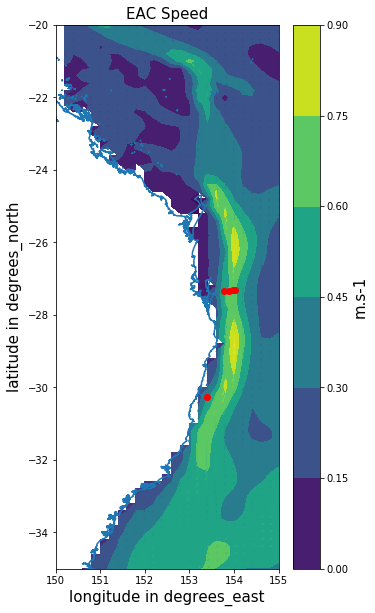

In [12]:
plt.figure(figsize=(5,10))
Q2 = plt.pcolor(lonData[::], latData[::],sm[::,::])
plt.contourf(lonData[::],latData[::],sm[::,::])
cbar = colorbar()
plt.title("EAC Speed",fontsize=15)
xlabel(LON.long_name + ' in ' + LON.units,fontsize=15)
ylabel(LAT.long_name + ' in ' + LAT.units,fontsize=15)
cbar.ax.set_ylabel('m.s-1',fontsize=15)
plt.plot(coast[:,0],coast[:,1])
plt.ylim(-35, -20)     
plt.xlim(150, 155)
Q = plt.quiver(lonData[::], latData[::], um[::,::], vm[::,::], sm[::,::], units='width')
#ADCP
plt.plot([153.39], [-30.27], 'ro')
plt.plot([153.77], [-27.34], 'ro') #SEQ200
plt.plot([153.88], [-27.33], 'ro') #SEQ400
plt.plot([153.97], [-27.31], 'ro') #EAC1
plt.plot([154.03], [-27.30], 'ro')
show()